In [ ]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.9.7.29-1+cuda12.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8 libcudnn8-dev
2 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Need to get 885 MB of archives.
After this operation, 56.3 kB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libcudnn8-dev 8.9.7.29-1+cuda12.2 [440 MB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libcudnn8 8.9.7.29-1+cuda12.2 [444 MB]
Fetched 885 MB in 26s (33.6 MB/s)
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libcudnn8-dev_8.9.7.29-1+cuda12.2_amd64.deb ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
Unpacking libcudnn8-dev (8

In [ ]:
DATASET_PATH = '/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/image_classification/cats_vs_dogs.py'
!sed -i 's/3367a/5340/g' {DATASET_PATH}

sed: can't read /usr/local/lib/python3.7/dist-packages/tensorflow_datasets/image_classification/cats_vs_dogs.py: No such file or directory


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2

In [ ]:
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)
validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete40ZAAK/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
def preprocess(image, label):
    # Extract image and species label
    # Adjust if the key is different

    label = tf.one_hot(label, depth=2)


    return image, label


# Apply the preprocessing function to your dataset
train_data = train_data.map(preprocess)
validation_data = validation_data.map(preprocess)
test_data = test_data.map(preprocess)


In [ ]:
def augment_images(image, label):

  # cast to float
  image = tf.cast(image, tf.float32)
  # normalize the pixel values
  image = (image/255)
  # resize to 300 x 300
  image = tf.image.resize(image,(300,300))

  return image, label

# use the utility function above to preprocess the images
augmented_training_data = train_data.map(augment_images)

# shuffle and create batches before training
train_batches = augmented_training_data.shuffle(1024).batch(32)
augmented_validation_data = validation_data.map(augment_images)
validation_batches = augmented_validation_data.batch(32)

In [ ]:
model = Sequential()
model.add(Conv2D(16,input_shape=(300,300,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 64)        0

In [ ]:
# Training will take around 30 minutes to complete using a GPU. Time for a break!

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(train_batches,epochs=25,validation_data = validation_batches)

Epoch 1/25
582/582 [==============================] - 70s 107ms/step - loss: 0.6578 - accuracy: 0.5933 - val_loss: 0.6324 - val_accuracy: 0.6281
Epoch 2/25
582/582 [==============================] - 63s 106ms/step - loss: 0.6200 - accuracy: 0.6516 - val_loss: 0.5876 - val_accuracy: 0.6969
Epoch 3/25
582/582 [==============================] - 60s 99ms/step - loss: 0.5869 - accuracy: 0.6909 - val_loss: 0.6015 - val_accuracy: 0.6879
Epoch 4/25
582/582 [==============================] - 61s 102ms/step - loss: 0.5636 - accuracy: 0.7105 - val_loss: 0.5626 - val_accuracy: 0.7201
Epoch 5/25
582/582 [==============================] - 52s 86ms/step - loss: 0.5459 - accuracy: 0.7313 - val_loss: 0.6239 - val_accuracy: 0.6771
Epoch 6/25
582/582 [==============================] - 54s 90ms/step - loss: 0.5274 - accuracy: 0.7421 - val_loss: 0.5091 - val_accuracy: 0.7597
Epoch 7/25
582/582 [==============================] - 60s 100ms/step - loss: 0.5057 - accuracy: 0.7575 - val_loss: 0.5048 - val_accur

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

print(model.input)
print(model.layers[-3].output)
print(model.layers[-1].output)

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496 

In [ ]:
def show_cam(image_value, features, results):
  '''
  Displays the class activation map of an image

  Args:
    image_value (tensor) -- preprocessed input image with size 300 x 300
    features (array) -- features of the image, shape (1, 37, 37, 128)
    results (array) -- output of the sigmoid layer
  '''

  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction =  np.argmax(results[0])

  class_labels = ['Cat', 'Dog']
  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,np.argmax(results[0])]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (300/37, 300/37, 1), order=2)

  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  predicted_class = class_labels[prediction]
  # visualize the results
  print(f'softmax output: {results}')
  print(f"prediction: {predicted_class}")
  plt.figure(figsize=(8,8))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()


In [ ]:
!wget -O cat1.jpg https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
!wget -O cat2.jpg https://i.natgeofe.com/n/9135ca87-0115-4a22-8caf-d1bdef97a814/75552.jpg
!wget -O catanddog.jpg https://www.telegraph.co.uk/content/dam/news/2023/06/10/TELEMMGLPICT000296384999_16864028803870_trans_NvBQzQNjv4BqrCS9JVgwgb8GODK1xmD4xlHwtdpQwyNje2OyIL7x97s.jpeg
!wget -O dog1.jpg https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg
!wget -O dog2.jpg https://www.hindustantimes.com/ht-img/img/2023/08/25/1600x900/international_dog_day_1692974397743_1692974414085.jpg

--2023-12-28 17:05:04--  https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
Resolving www.alleycat.org (www.alleycat.org)... 141.193.213.21, 141.193.213.20
Connecting to www.alleycat.org (www.alleycat.org)|141.193.213.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107329 (105K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 104.81K  --.-KB/s    in 0.005s  

2023-12-28 17:05:04 (20.5 MB/s) - ‘cat1.jpg’ saved [107329/107329]

--2023-12-28 17:05:04--  https://i.natgeofe.com/n/9135ca87-0115-4a22-8caf-d1bdef97a814/75552.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 104.109.143.68, 104.109.143.79, 2a02:26f0:f4::58dd:904b, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|104.109.143.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1060932 (1.0M) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>]   1.01M  2.09MB/s    in 0.5s    

2023-12-28 17:05:06 (2

1/1 [==============================] - 1s 595ms/step
softmax output: [[0.9304619  0.06953807]]
prediction: Cat


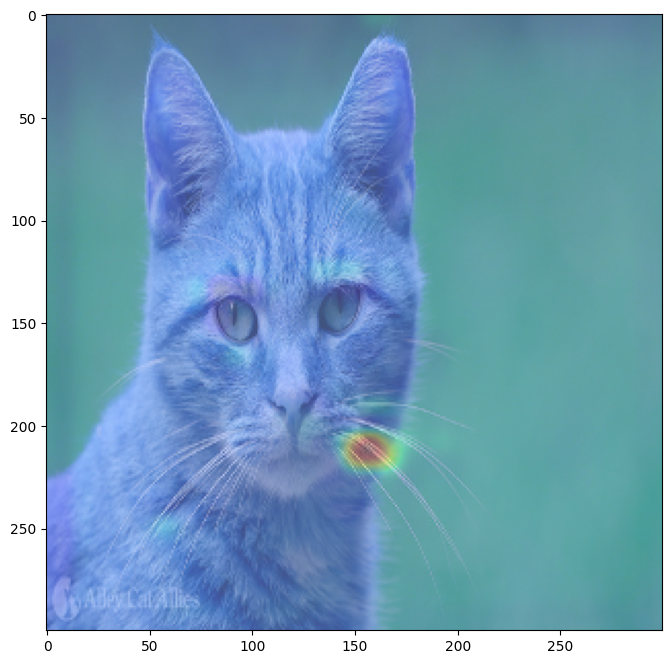

1/1 [==============================] - 0s 21ms/step
softmax output: [[0.95733744 0.04266256]]
prediction: Cat


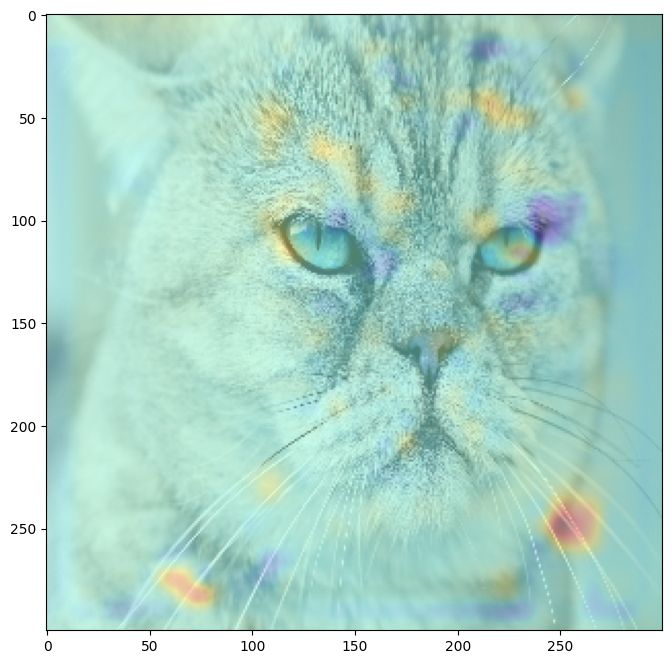

1/1 [==============================] - 0s 20ms/step
softmax output: [[0.83823615 0.16176385]]
prediction: Cat


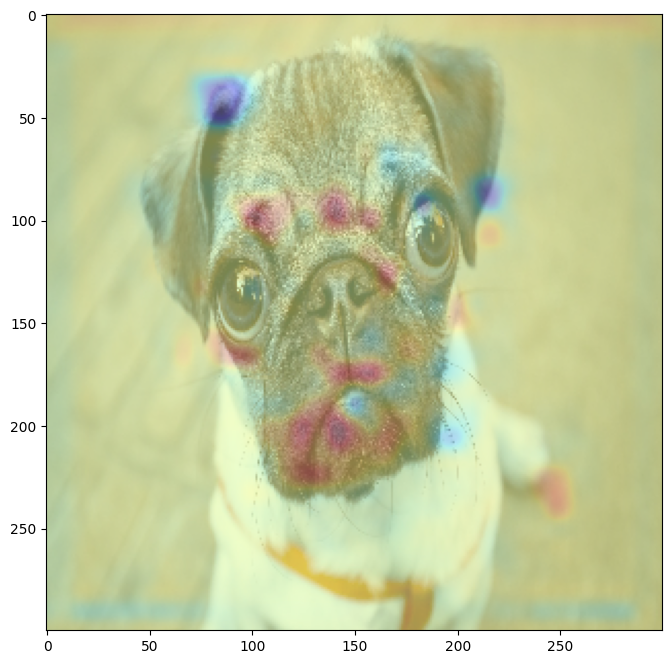

1/1 [==============================] - 0s 28ms/step
softmax output: [[0.9451863  0.05481363]]
prediction: Cat


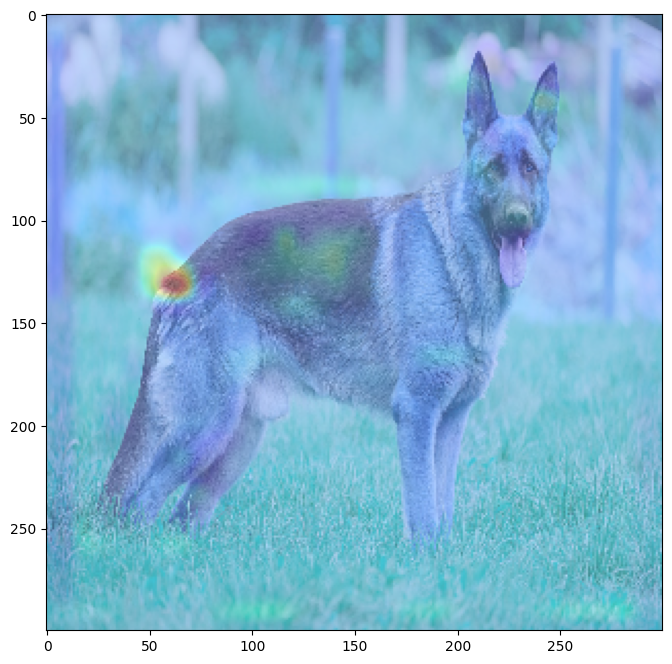

1/1 [==============================] - 0s 40ms/step
softmax output: [[0.12363312 0.87636685]]
prediction: Dog


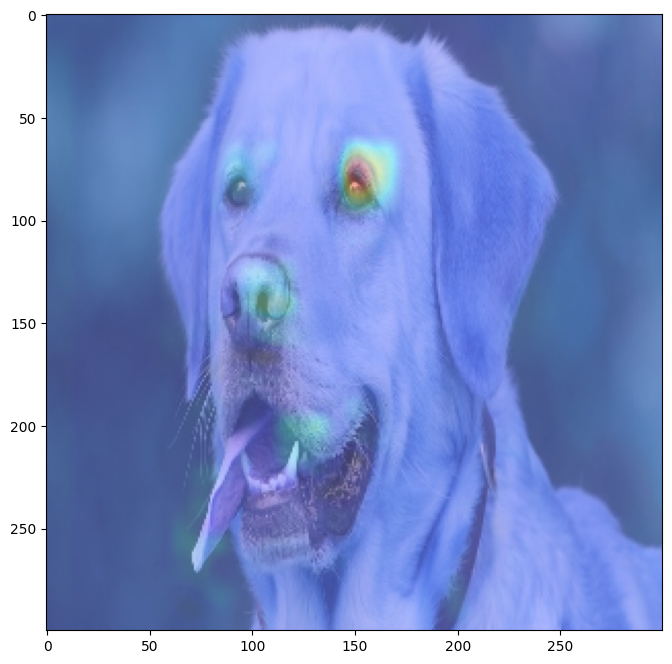

In [ ]:
# utility function to preprocess an image and show the CAM
def convert_and_classify(image):

  # load the image
  img = cv2.imread(image)

  # preprocess the image before feeding it to the model
  img = cv2.resize(img, (300,300)) / 255.0

  # add a batch dimension because the model expects it
  tensor_image = np.expand_dims(img, axis=0)

  # get the features and prediction
  features,results = cam_model.predict(tensor_image)

  # generate the CAM
  show_cam(tensor_image, features, results)

convert_and_classify('cat1.jpg')
convert_and_classify('cat2.jpg')
convert_and_classify('catanddog.jpg')
convert_and_classify('dog1.jpg')
convert_and_classify('dog2.jpg')

Let's also try it with some of the test images before we make some observations.

ground truth: cat
1/1 [==============================] - 0s 24ms/step
softmax output: [[0.990879   0.00912107]]
prediction: Cat


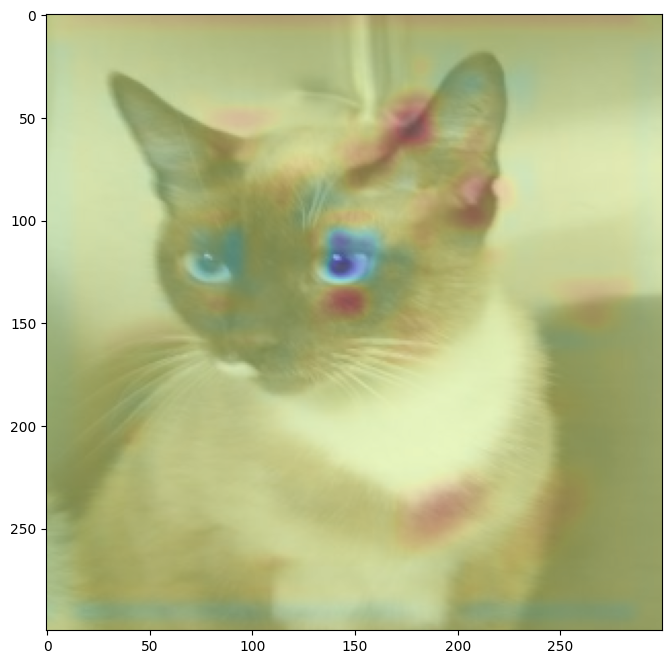

ground truth: dog
1/1 [==============================] - 0s 22ms/step
softmax output: [[0.7976778  0.20232219]]
prediction: Cat


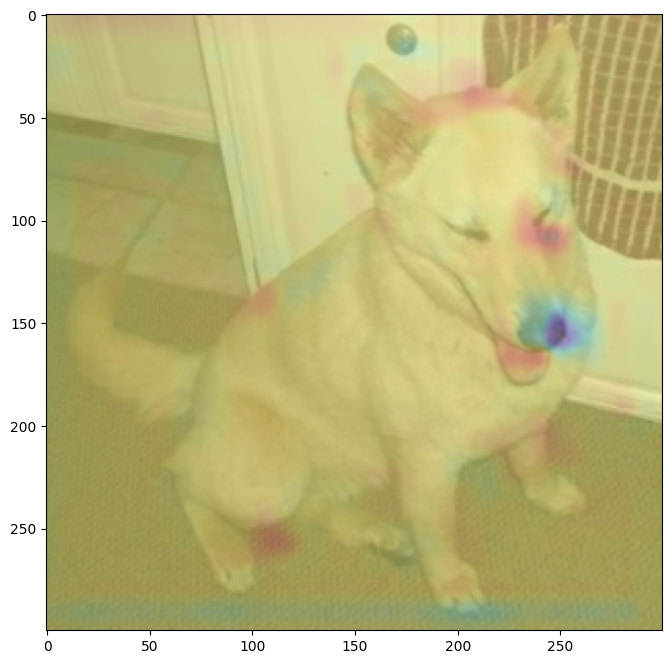

ground truth: dog
1/1 [==============================] - 0s 27ms/step
softmax output: [[0.61544853 0.38455147]]
prediction: Cat


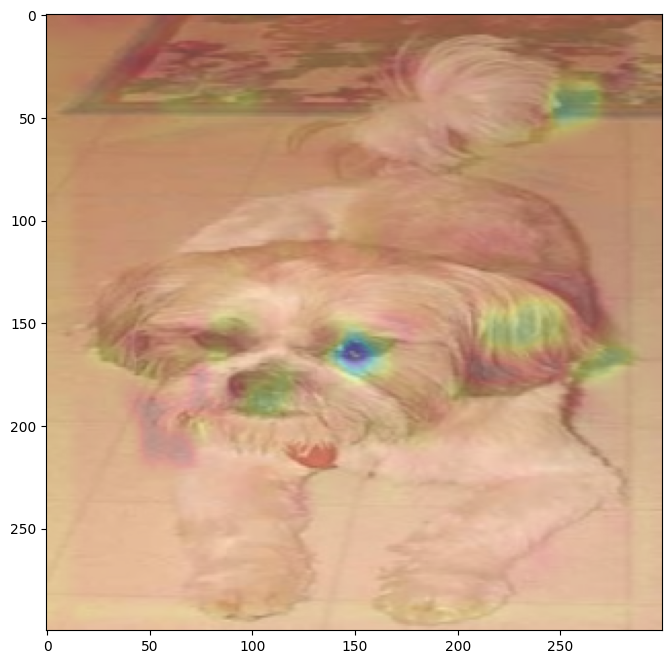

ground truth: cat
1/1 [==============================] - 0s 30ms/step
softmax output: [[9.997415e-01 2.585324e-04]]
prediction: Cat


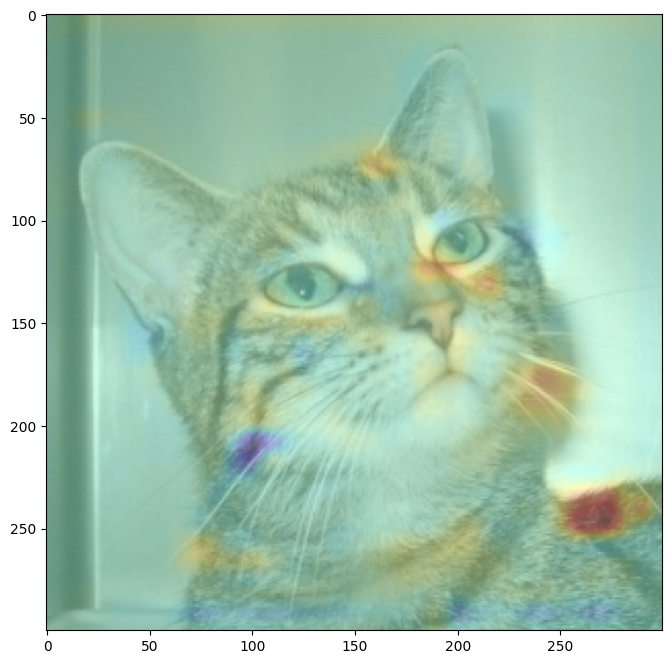

ground truth: cat
1/1 [==============================] - 0s 29ms/step
softmax output: [[0.90454555 0.09545449]]
prediction: Cat


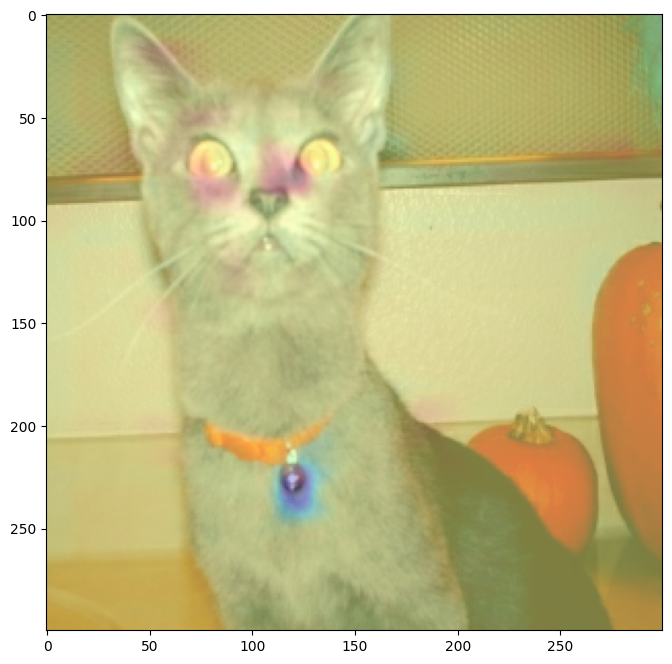

In [ ]:
# preprocess the test images
augmented_test_data = test_data.map(augment_images)
test_batches = augmented_test_data.batch(1)


for img, lbl in test_batches.take(5):
    # Convert lbl tensor to numpy and use the first element for condition
    lbl_np = lbl.numpy()
    ground_truth = 'cat' if lbl_np[0][0] == 1 else 'dog'  # Adjust depending on how your labels are encoded

    print(f"ground truth: {ground_truth}")
    features, results = cam_model.predict(img)
    show_cam(img, features, results)